In [43]:
import heapq
import math

In [44]:
GRID_SIZE = 200
START = (0, 0)
GOAL = (200, 200)

In [45]:
# (dx, dy, cost)
MOVES = [(1, 0, 1), (-1, 0, 1), (0, 1, 1), (0, -1, 1), (1, 1, math.sqrt(2)), (1, -1, math.sqrt(2)), (-1, 1, math.sqrt(2)), (-1, -1, math.sqrt(2))]

In [46]:
# Check if cell is inside grid
def in_bounds(x, y):
    return 0 <= x <= GRID_SIZE and 0 <= y <= GRID_SIZE

In [47]:
# (x1, x2, y1, y2)
OBSTACLES = [(40, 40, 70, 70), (90, 120, 130, 160), (150, 50, 180, 90), (60, 150, 100, 190)]

In [48]:
def is_blocked(x, y):
    for x1, y1, x2, y2 in OBSTACLES:
        if x1 <= x <= x2 and y1 <= y <= y2:
            return True
    return False

In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
def create_visual_grid(path, expanded):
    grid = np.zeros((GRID_SIZE + 1, GRID_SIZE + 1))
    # Obstacles
    for x1, y1, x2, y2 in OBSTACLES:
        for x in range(x1, x2 + 1):
            for y in range(y1, y2 + 1):
                grid[y][x] = 1
    # Expanded nodes
    for x, y in expanded:
        if grid[y][x] == 0:
            grid[y][x] = 2
    # Path
    for x, y in path:
        grid[y][x] = 3

    return grid

In [51]:
def plot_grid(grid, title):
    plt.figure(figsize=(8, 8))
    cmap = plt.colormaps.get_cmap("coolwarm")

    plt.imshow(grid, cmap=cmap, origin="lower")
    plt.colorbar(ticks=[0, 1, 2, 3], label="Legend")

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

In [52]:
def neighbors(x, y):
    for dx, dy, cost in MOVES:
        nx, ny = x + dx, y + dy
        if in_bounds(nx, ny) and not is_blocked(nx, ny):
            yield (nx, ny, cost)

In [53]:
def dijkstra(start, goal):
    pq = [(0, start)]
    dist = {start: 0}
    parent = {}
    visited = set()
    expanded_nodes = []

    while pq:
        cost, node = heapq.heappop(pq)
        if node in visited:
            continue

        visited.add(node)
        expanded_nodes.append(node)

        if node == goal:
            # Reconstruct path
            path = []
            cur = goal
            while cur != start:
                path.append(cur)
                cur = parent[cur]
            path.append(start)
            path.reverse()

            return path, cost, expanded_nodes

        for nx, ny, move_cost in neighbors(*node):
            new_cost = cost + move_cost
            if (nx, ny) not in dist or new_cost < dist[(nx, ny)]:
                dist[(nx, ny)] = new_cost
                parent[(nx, ny)] = node
                heapq.heappush(pq, (new_cost, (nx, ny)))

    return None, float("inf"), expanded_nodes

In [54]:
d_path, d_cost, d_expanded = dijkstra(START, GOAL)
print(f"Path Cost      = {d_cost:.3f}")
print(f"Expanded Nodes = {len(d_expanded)}")

Path Cost      = 301.002
Expanded Nodes = 34928


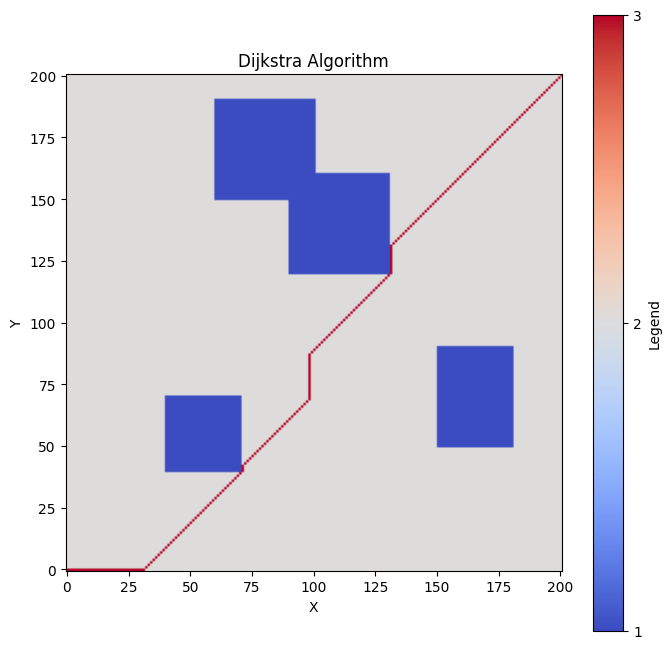

In [55]:
d_grid = create_visual_grid(d_path, d_expanded)
plot_grid(d_grid, "Dijkstra Algorithm")

In [56]:
# In above visulaization, obstacles are blue, explored nodes are gray in color and the path is in red

In [57]:
def heuristic(a, b):
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    return (max(dx, dy) - min(dx, dy)) + math.sqrt(2) * min(dx, dy)

In [58]:
def astar(start, goal):
    pq = [(heuristic(start, goal), 0, start)]
    g_cost = {start: 0}
    parent = {}
    visited = set()
    expanded_nodes = []

    while pq:
        f, g, node = heapq.heappop(pq)
        if node in visited:
            continue

        visited.add(node)
        expanded_nodes.append(node)

        if node == goal:
            # Reconstruct path
            path = []
            cur = goal
            while cur != start:
                path.append(cur)
                cur = parent[cur]
            path.append(start)
            path.reverse()

            return path, g, expanded_nodes

        for nx, ny, move_cost in neighbors(*node):
            new_g = g + move_cost
            if (nx, ny) not in g_cost or new_g < g_cost[(nx, ny)]:
                g_cost[(nx, ny)] = new_g
                parent[(nx, ny)] = node
                new_f = new_g + heuristic((nx, ny), goal)
                heapq.heappush(pq, (new_f, new_g, (nx, ny)))

    return None, float("inf"), expanded_nodes

In [59]:
a_path, a_cost, a_expanded = astar(START, GOAL)
print(f"Path Cost      = {a_cost:.3f}")
print(f"Expanded Nodes = {len(a_expanded)}")

Path Cost      = 301.002
Expanded Nodes = 8134


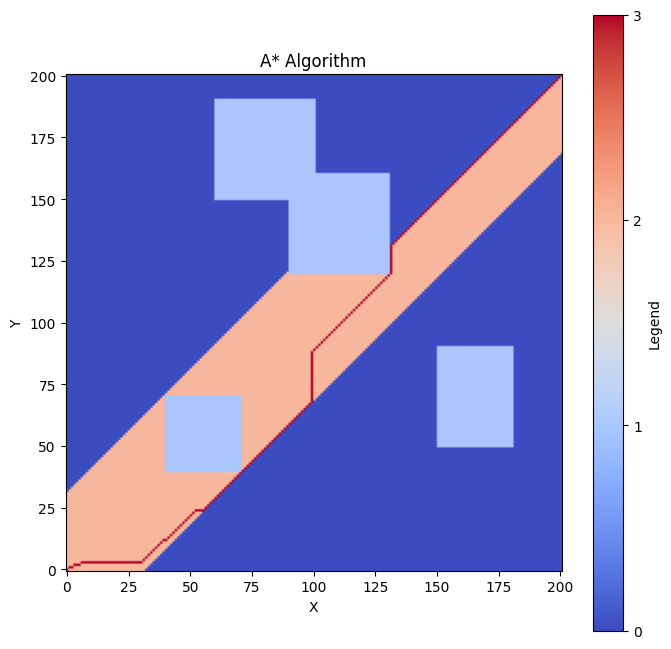

In [60]:
grid = create_visual_grid(a_path, a_expanded)
plot_grid(grid, "A* Algorithm")

In [61]:
# In above visulaization, unexplored nodes are dark-blue, obstacles are sky-blue, explored nodes are of peach color and the path is in red

In [62]:
# So, cost of path explored as shortest using both algorithm is same
# In Dijkstra algotrithm no node seem to be unexplored => slower
# But in A* algorithm comparatively less number of nodes are explored

# So, overall A* algorithm is better than Dijkstra algorithm